# Visualize i/p tensor

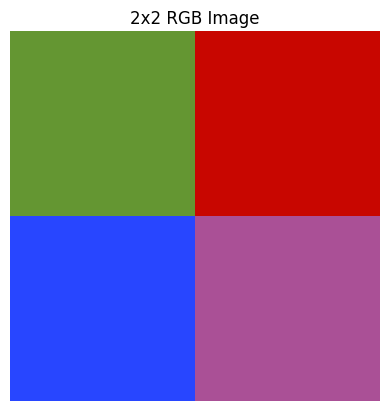

In [34]:
# VISUALIZE INPUT TENSORS OF SHAPE: [batch_size, channels, height, width]

# eg.
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# (example values) -> pixel values between 0 to 255
tensor = torch.tensor([[
    [[100,200], [40,170]],  # Red channel
    [[150,6], [70,80]],  # Green channel
    [[50,0], [255,150]]   # Blue channel
]])

# Convert to numpy and prepare for visualization
image = tensor.squeeze(0)  # Remove batch dimension -> 3x2x2
image = image.permute(1, 2, 0)  # Change to HxWxC format -> 2x2x3
image = image.numpy()  # Convert to numpy array

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('2x2 RGB Image')
plt.show()

# Function to plot tensor

In [35]:
# FUNCTION TO PLOT TENSOR
def plot_tensor(input_tensor, title="", grid=True, sample_image=False):

    if input_tensor.requires_grad:
        image = input_tensor.detach().squeeze(0).permute(1, 2, 0).numpy()
    else:
        image = input_tensor.squeeze(0).permute(1, 2, 0).numpy()
    
    #image = input_tensor.squeeze(0).permute(1, 2, 0).numpy() # Remove batch dimension and change to HxWxC and convert to numpy
    
    plt.figure(figsize=(8,8))
    if sample_image:
        plt.imshow(image) # Normalization is not required for sample images since ToTensor() already normalizes them.
    else:
        plt.imshow(image/255) # Normalize pixel values to 0-1
    if grid:
        plt.grid(which='both', color='white', linestyle='-', linewidth=0.5) # draw grid lines for better visualization
        plt.xticks(np.arange(-0.5, image.shape[1], 1)) # Show grid lines for every pixel
        plt.yticks(np.arange(-0.5, image.shape[0], 1)) 
    plt.title(f"{title} {image.shape[:2]}") 
    plt.show()

In [36]:
def plot_multiple_channels(input_tensor, title="", n_channels=3):
    if input_tensor.requires_grad:
        image = input_tensor.detach().squeeze(0).permute(1, 2, 0).numpy()
    else:
        image = input_tensor.squeeze(0).permute(1, 2, 0).numpy()
    
    fig, axes = plt.subplots(1, n_channels, figsize=(15, 5))
    for i in range(n_channels):
        axes[i].imshow(image[:, :, i], cmap='viridis')
        axes[i].set_title(f"Channel {i}")
    plt.suptitle(title)
    plt.show()

# test patterns

In [37]:
# test pattern: b/w 1
input = torch.zeros(1, 3, 4, 4)
input[0,:,0,0] = 1    # Red
input[0,:,2,2] = 1    # Green
input[0,:,3,3] = 1    # Blue
input = input * 255   # Scale to 0-255

# test pattern: color
# tensor of shape 1x3x30x30 with random values ranging from 0 to 255
color_input = torch.randint(0, 256, (1, 3, 8, 8), dtype=torch.float32)

# Nearest Interplotation

For each new pixel in the output image, take the value of the closest original pixel.

## B/W image

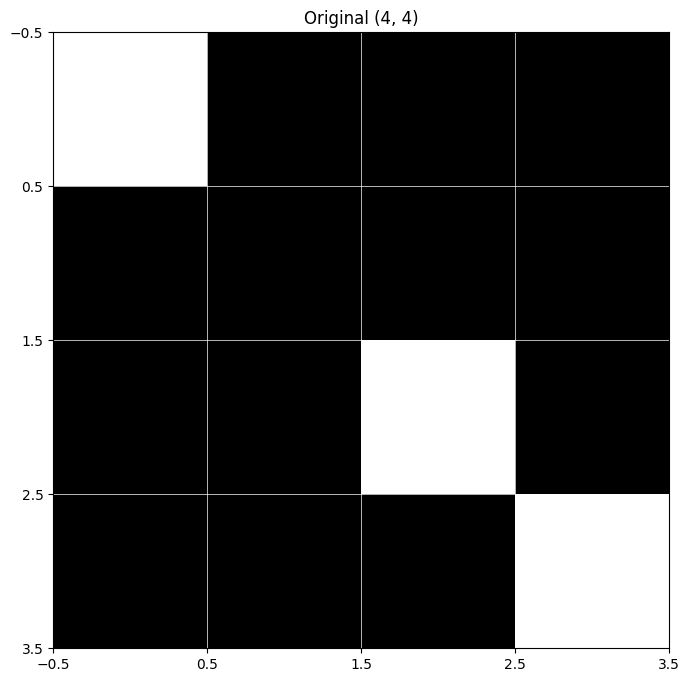

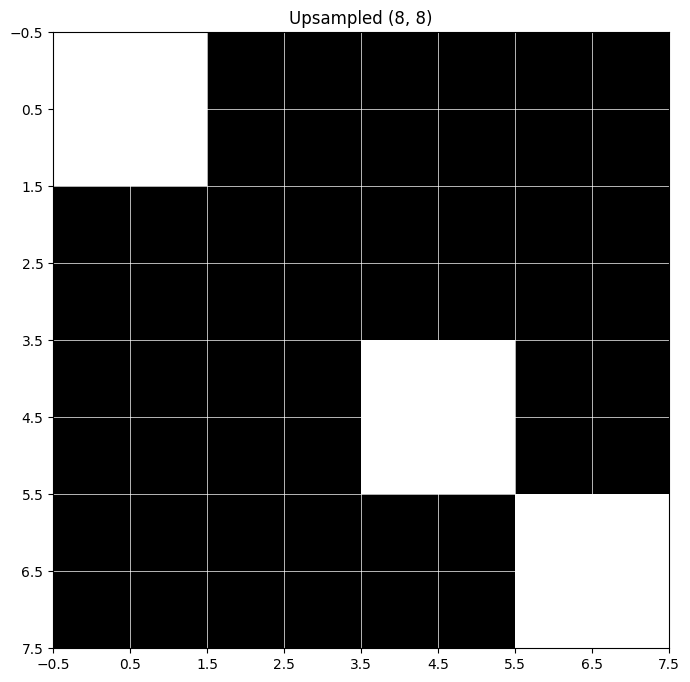

In [38]:
# NEAREST INTERPOLATION

plot_tensor(input, "Original")

# Upsample with very large scaling
nearest2_ = nn.Upsample(scale_factor=2, mode='nearest')
res = nearest2_(input)
plot_tensor(res, "Upsampled")

## Color image

input shape:  torch.Size([1, 3, 8, 8])


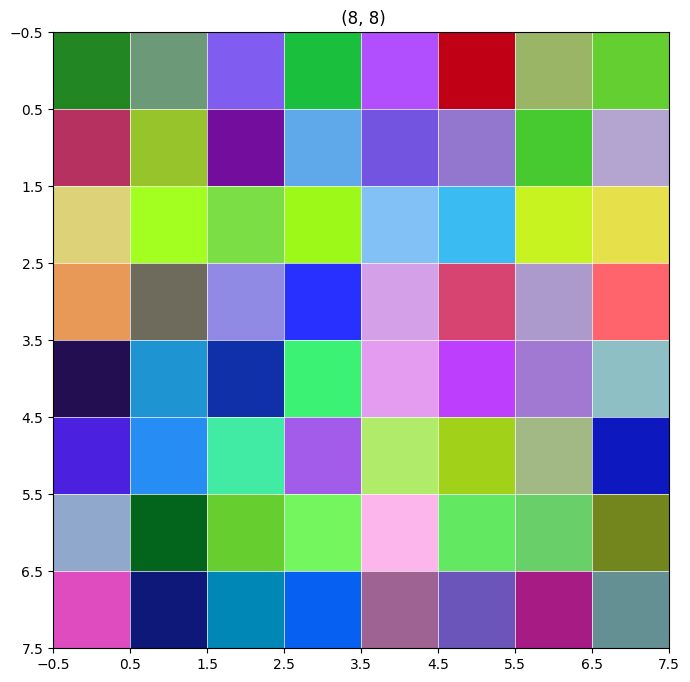

shape after upsampling:  torch.Size([1, 3, 16, 16])


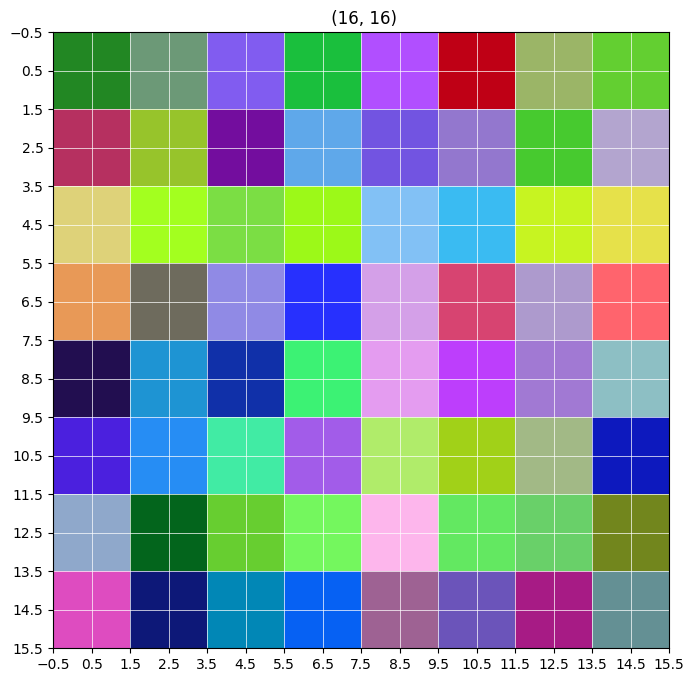

In [39]:
# NEAREST NEIGHBOR INTERPOLATION Eg.

print("input shape: ", color_input.shape)
#print("input: ", input)

# visualize the input tensor
plot_tensor(input_tensor = color_input)

# upsample the input tensor
nearest1_ = nn.Upsample(scale_factor=2, mode='nearest')
res = nearest1_(color_input)
# Upsample: is for resizing the input tensor - essentially, increasing the resolution of the image.
# scale_factor: if 2, then the height and width of the image will be doubled.
# mode: nearest - the nearest pixel value is used for the new pixels.
# other modes: bilinear, bicubic, trilinear, etc
# align_corners: if True, the corner pixels of the input and output tensors are aligned, and thus preserving the spatial dimensions.

print("shape after upsampling: ", res.shape)
#print("nearest interpolation: ", res)

# visualize the upsampled tensor
plot_tensor(input_tensor = res)

# Bilinear Interplotation

For each new pixel, take a weighted average of the 4 closest original pixels.

## B/W image

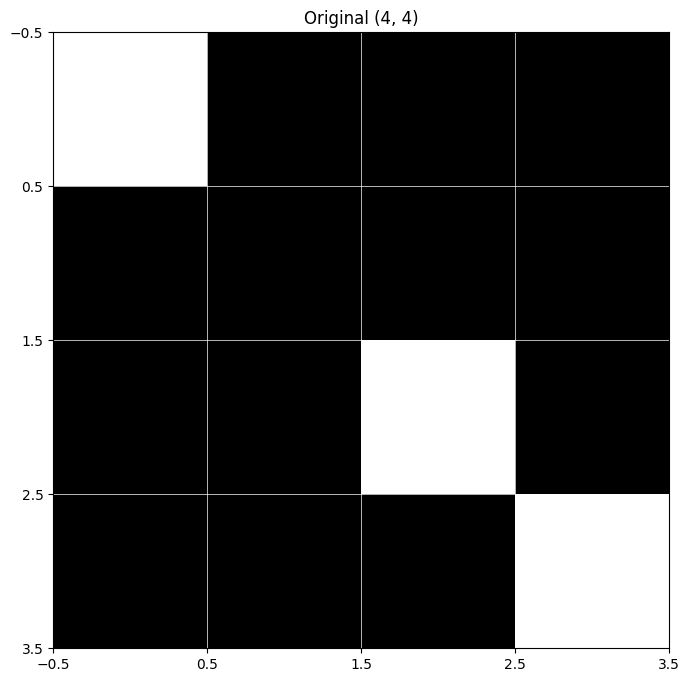

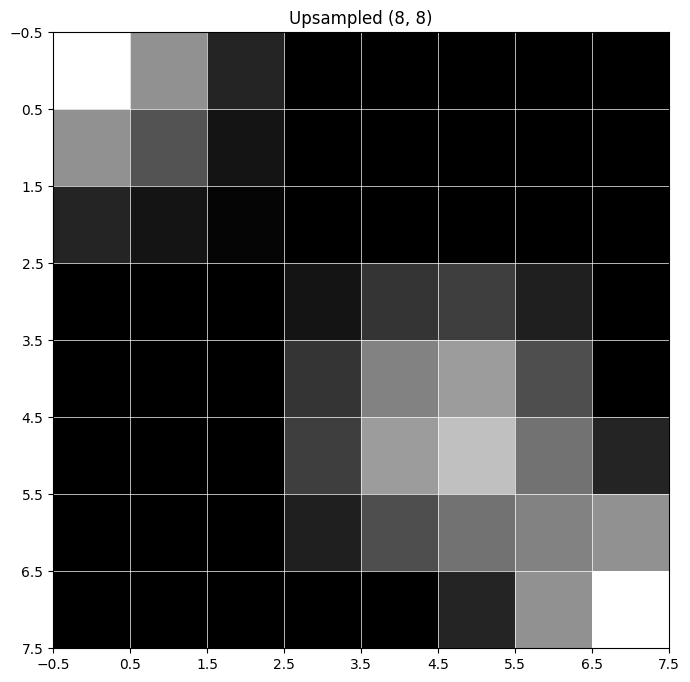

In [40]:
# BILINEAR INTERPOLATION
plot_tensor(input, "Original")

# Upsample with very large scaling
bilinear_ = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
res = bilinear_(input)
plot_tensor(res, "Upsampled")


## color image

original shape:  torch.Size([1, 3, 8, 8])


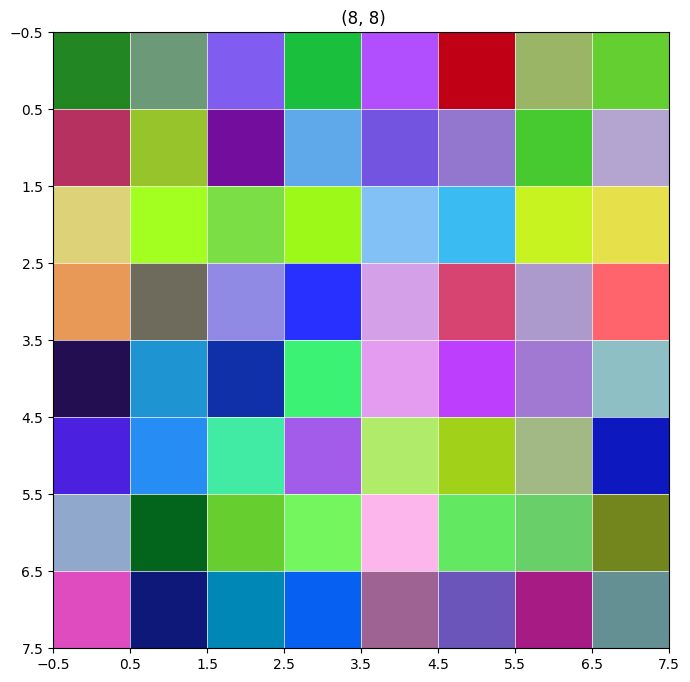

shape after upsampling:  torch.Size([1, 3, 32, 32])


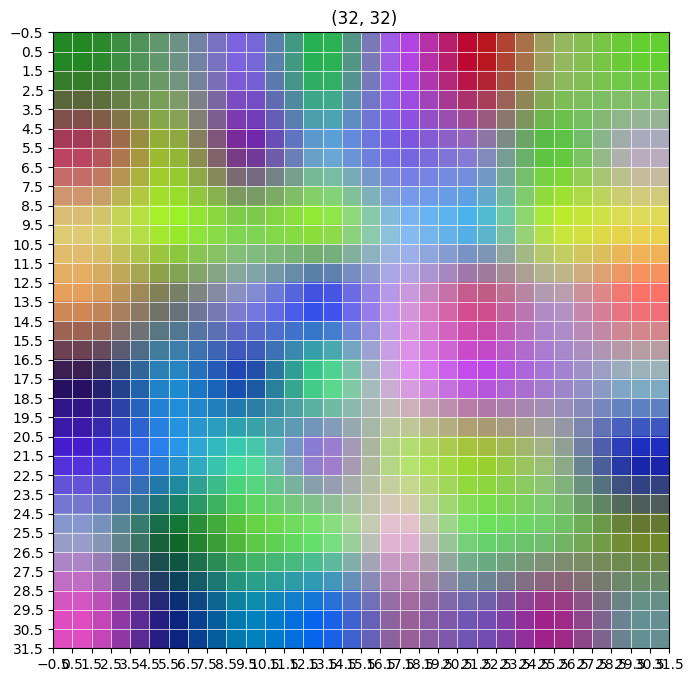

In [41]:
# BILINEAR INTERPOLATION OF COLOR IMAGE

print("original shape: ", color_input.shape)
plot_tensor(input_tensor = color_input)

bilinear1_ = nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False)
res = bilinear1_(color_input)

print("shape after upsampling: ", res.shape)
plot_tensor(input_tensor = res)

# Test image

In [42]:
# convert jpg to tensor
from PIL import Image
import torchvision.transforms as transforms

# Load image from file
img = Image.open("C:\\Users\\kruth\\yolov5_from_scratch\\sample_images\\low_resolution.jpg")
print("original image size: ", img.size)

# Define transformations
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.ToTensor()  # Convert to Tensor -> (3, 256, 256)
])

# Apply transformations
img_tensor = preprocess(img)
print("tensor shape: ", img_tensor.shape)

# add batch dimension
img_tensor = img_tensor.unsqueeze(0)
print("tensor shape after adding batch dimension: ", img_tensor.shape)


original image size:  (800, 666)
tensor shape:  torch.Size([3, 256, 256])
tensor shape after adding batch dimension:  torch.Size([1, 3, 256, 256])


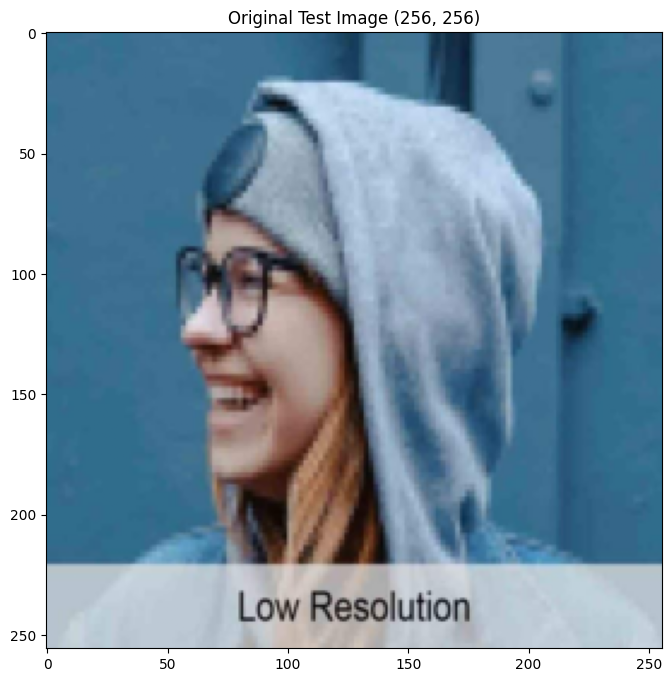

In [43]:
# show test image after preprocessing
plot_tensor(input_tensor = img_tensor, title = "Original Test Image", grid=False, sample_image=True)

shape after upsampling:  torch.Size([1, 3, 8192, 8192])


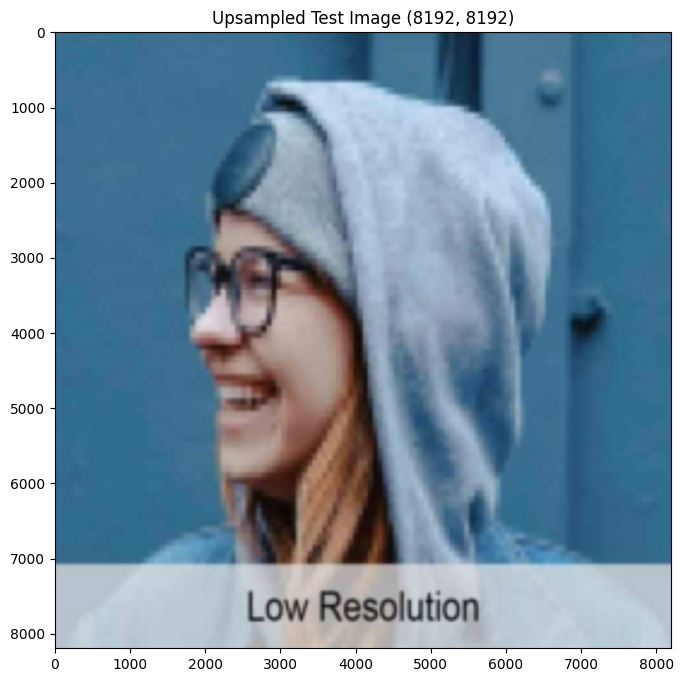

In [44]:
# BILINEAR INTERPOLATION OF TEST IMAGE
sample_img_bilinear = nn.Upsample(scale_factor=32, mode='bilinear', align_corners=False)
res = sample_img_bilinear(img_tensor)

print("shape after upsampling: ", res.shape)
plot_tensor(input_tensor = res, title = "Upsampled Test Image", grid=False, sample_image=True)

# Concatenation Operation

In [45]:
# example of concatenation of tensors

# Create two tensors
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Concatenate along rows
ab = torch.cat((a, b), dim=0)
print("Concatenated along rows:")
print(ab)

Concatenated along rows:
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


# Test the custom implementation

In [46]:
from custom_yolov5s import YOLOV5S
model = YOLOV5S()

# sample input
x = torch.rand(1, 3, 640, 640)

# forward pass through backbone and neck
output_x, inputs_to_head = model(x)
print("model ran succesfully")
print("shape of output_x: ", output_x.shape)
for i in inputs_to_head:
    print("shape of inputs to head: ", i.shape)

model ran succesfully
shape of output_x:  torch.Size([1, 512, 20, 20])
shape of inputs to head:  torch.Size([1, 128, 80, 80])
shape of inputs to head:  torch.Size([1, 256, 40, 40])
shape of inputs to head:  torch.Size([1, 512, 20, 20])


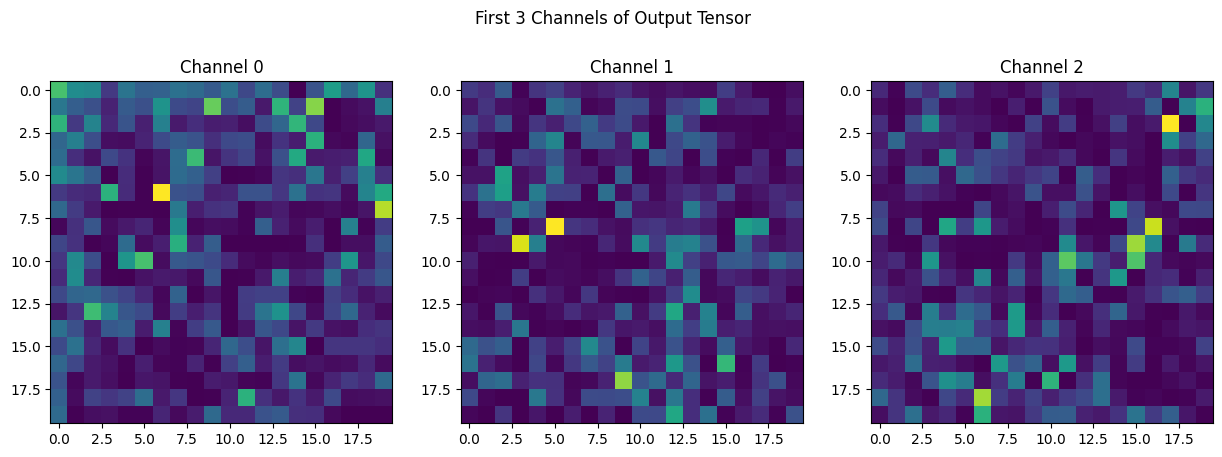

In [48]:
# visulize the output tensor
plot_multiple_channels(output_x, title="First 3 Channels of Output Tensor", n_channels=3)

In [47]:
print(model) # prints the model architecture

YOLOV5S(
  (backbone): ModuleList(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): SiLU()
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): SiLU()
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): SiLU()
      )
      (cv2): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): SiLU()
      )
      (m): Sequential(
        (0

In [49]:
# export the model to onnx

# export to ONNX
torch.onnx.export(model, 
                x, 
                "custom_yolov5s.onnx", 
                opset_version=11,
                #do_constant_folding=False, #prevent folding of batch norm into conv,
                input_names=['input'],
                output_names=['output'],
)

c:\Users\kruth\yolov5_from_scratch\custom_yolov5s.py:331: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert x.shape[2] % 32 == 0 and x.shape[3] % 32 == 0
